In [2]:
import os
import glob
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = os.path.join(os.getcwd(), "new_csv")
almaty_directory = glob.glob(os.path.join(path, "almaty", "*.csv"))
astana_directory = glob.glob(os.path.join(path, "astana", "*.csv"))
ustkamenogorsk_directory = glob.glob(os.path.join(path, "ust-kamenogorsk", "*.csv"))

almaty = pd.concat((pd.read_csv(csv_file, quotechar='|') for csv_file in almaty_directory))
astana = pd.concat((pd.read_csv(csv_file, quotechar='|') for csv_file in astana_directory))
ust_kamenogorsk = pd.concat((pd.read_csv(csv_file, quotechar='|') for csv_file in ustkamenogorsk_directory))

cities = [almaty, astana, ust_kamenogorsk]
cities_data = pd.concat(cities)

In [5]:
cities_data['city'] = cities_data['city'].astype('category', ordered=True)

In [6]:
cities_data.head()

,id,date,city,address,lat,lon,price,view_count,room_count,image_count,comment_count,color,is_owner,is_urgent,building_type,building_year,floor,building_floors,area_total,area_living,area_kitchen,renovation,toilet,balcony,balcony_glass,door,phone,inet_type,furniture,floor_type,security,priv_dorm,parking,room_height,complex,is_pledged
0,27915992,08.01.2018,"Алматы, Бостандыкский р-н",Навои 208,43.206766,76.884964,64000000,3,4,8,0,NaN,0,0,монолитный,2014.0,3.0,16.0,130.0,80.0,22.0,евроремонт,2 с/у и более,балкон,NaN,NaN,NaN,NaN,частично меблирована,NaN,NaN,нет,NaN,NaN,Шахристан,0
1,27808874,08.01.2018,"Алматы, Ауэзовский р-н",Бауыржана Момышулы — Толе би,43.237610,76.829618,10500000,46,1,2,0,NaN,0,0,панельный,1983.0,7.0,9.0,40.0,18.0,9.0,NaN,совмещенный,NaN,NaN,металлическая,отдельный,проводной,NaN,линолеум,домофон,нет,рядом охраняемая стоянка,NaN,NaN,0
2,27445667,08.01.2018,"Алматы, Медеуский р-н",проспект Достык 162 — Жолдасбекова,43.233735,76.959820,150000000,243,9,26,0,blue,0,1,монолитный,2007.0,20.0,20.0,455.0,NaN,NaN,хорошее,2 с/у и более,балкон и лоджия,да,металлическая,NaN,NaN,пустая,NaN,"охрана, кодовый замок, видеонаблюдение",нет,паркинг,6 м,Алматы Тауэрс,0
3,27915990,08.01.2018,"Алматы, Бостандыкский р-н",Абая 20/1,43.240096,76.943022,17000000,2,2,5,0,NaN,0,0,панельный,1974.0,5.0,5.0,43.0,27.0,6.0,евроремонт,совмещенный,балкон,NaN,NaN,NaN,NaN,частично меблирована,ламинат,NaN,нет,NaN,NaN,NaN,0
4,27915989,08.01.2018,"Алматы, Бостандыкский р-н",Тимирязева,43.226572,76.918605,8700000,5,2,12,0,NaN,0,0,кирпичный,1976.0,3.0,5.0,40.0,18.0,11.0,среднее,раздельный,несколько балконов или лоджий,да,металлическая,NaN,NaN,NaN,линолеум,NaN,нет,рядом охраняемая стоянка,2.5,NaN,0


In [7]:
print(cities_data.shape)
print(cities_data.isnull().sum())
print(cities_data.dtypes)

(470521, 36)
id                      0
date                    0
city                    0
address                 0
lat                  4015
lon                  4015
price                   0
view_count              0
room_count              0
image_count             0
comment_count           0
color              434810
is_owner                0
is_urgent               0
building_type       25897
building_year         923
floor                7939
building_floors     12473
area_total              3
area_living        290199
area_kitchen       178034
renovation          29885
toilet              51947
balcony            123912
balcony_glass      262691
door               196752
phone              255254
inet_type          285747
furniture          146351
floor_type         172745
security           218232
priv_dorm           68948
parking            229392
room_height        234123
complex            287604
is_pledged              0
dtype: int64
id                    int64
date      

In [5]:
cities_data.describe(include='all')

,id,date,city,address,lat,lon,price,view_count,room_count,image_count,comment_count,color,is_owner,is_urgent,building_type,building_year,floor,building_floors,area_total,area_living,area_kitchen,renovation,toilet,balcony,balcony_glass,door,phone,inet_type,furniture,floor_type,security,priv_dorm,parking,room_height,complex,is_pledged
count,4.028200e+05,402820,402820,402820,399206.000000,399206.000000,4.028200e+05,402820.000000,402820.000000,402820.000000,402820.000000,30898,402820.000000,402820.000000,380399,402006.000000,395833.000000,391882.000000,402818.000000,154495.000000,250195.000000,376878,357708,295635,178586,237645,186865,159897,277951,254994,218556,344938,207088,201892,157392,402820.000000
unique,NaN,51,19,53492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,6,4,4,1,3,4,4,3,7,469,2,3,73,2130,NaN
top,NaN,25.12.2017,"Алматы, Бостандыкский р-н",мкр Аксай-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,NaN,NaN,монолитный,NaN,NaN,NaN,NaN,NaN,NaN,хорошее,раздельный,балкон,да,металлическая,отдельный,ADSL,частично меблирована,ламинат,домофон,нет,паркинг,2.8,Хайвил Астана,NaN
freq,NaN,23042,72172,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13161,NaN,NaN,127624,NaN,NaN,NaN,NaN,NaN,NaN,161924,151938,168485,178586,193886,160348,74978,133789,118218,69698,338807,107972,51740,2676,NaN
mean,2.696396e+07,NaN,NaN,NaN,46.578686,75.223817,2.759474e+07,241.214026,2.342093,6.572566,0.358006,NaN,0.183030,0.029437,NaN,1996.495923,5.202522,8.774042,71.732661,40.886818,10.453058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030865
std,2.190764e+06,NaN,NaN,NaN,4.707500,4.047967,3.662191e+07,809.115543,1.189577,6.816026,1.752982,NaN,0.386691,0.169030,NaN,18.383121,3.918962,5.299818,65.272123,143.474806,6.100243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172952
min,8.785300e+04,NaN,NaN,NaN,9.402342,0.420163,5.200000e+03,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,1900.000000,1.000000,1.000000,1.000000,1.000000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2.719564e+07,NaN,NaN,NaN,43.231863,71.456832,1.320000e+07,6.000000,2.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,1980.000000,2.000000,5.000000,44.400000,27.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2.766577e+07,NaN,NaN,NaN,43.261827,76.869102,1.800000e+07,25.000000,2.000000,6.000000,0.000000,NaN,0.000000,0.000000,NaN,2005.000000,4.000000,8.000000,60.000000,35.000000,9.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,2.786297e+07,NaN,NaN,NaN,51.126720,76.917007,2.850000e+07,161.000000,3.000000,9.000000,0.000000,NaN,0.000000,0.000000,NaN,2014.000000,7.000000,10.000000,83.000000,48.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [11]:
cities_data = cities_data.drop(['id', 'date'],axis=1)
cities_data = cities_data[(pd.notnull(cities_data['price']))
                          & (pd.notnull(cities_data['room_count']))
                          & (pd.notnull(cities_data['building_year']))
                          & (pd.notnull(cities_data['area_total']))
                          & (pd.notnull(cities_data['lat']))
                          & (pd.notnull(cities_data['lon']))]
#for some reasons
cities_data = cities_data[cities_data['room_count'] <= 6]

ValueError: labels ['id' 'date'] not contained in axis

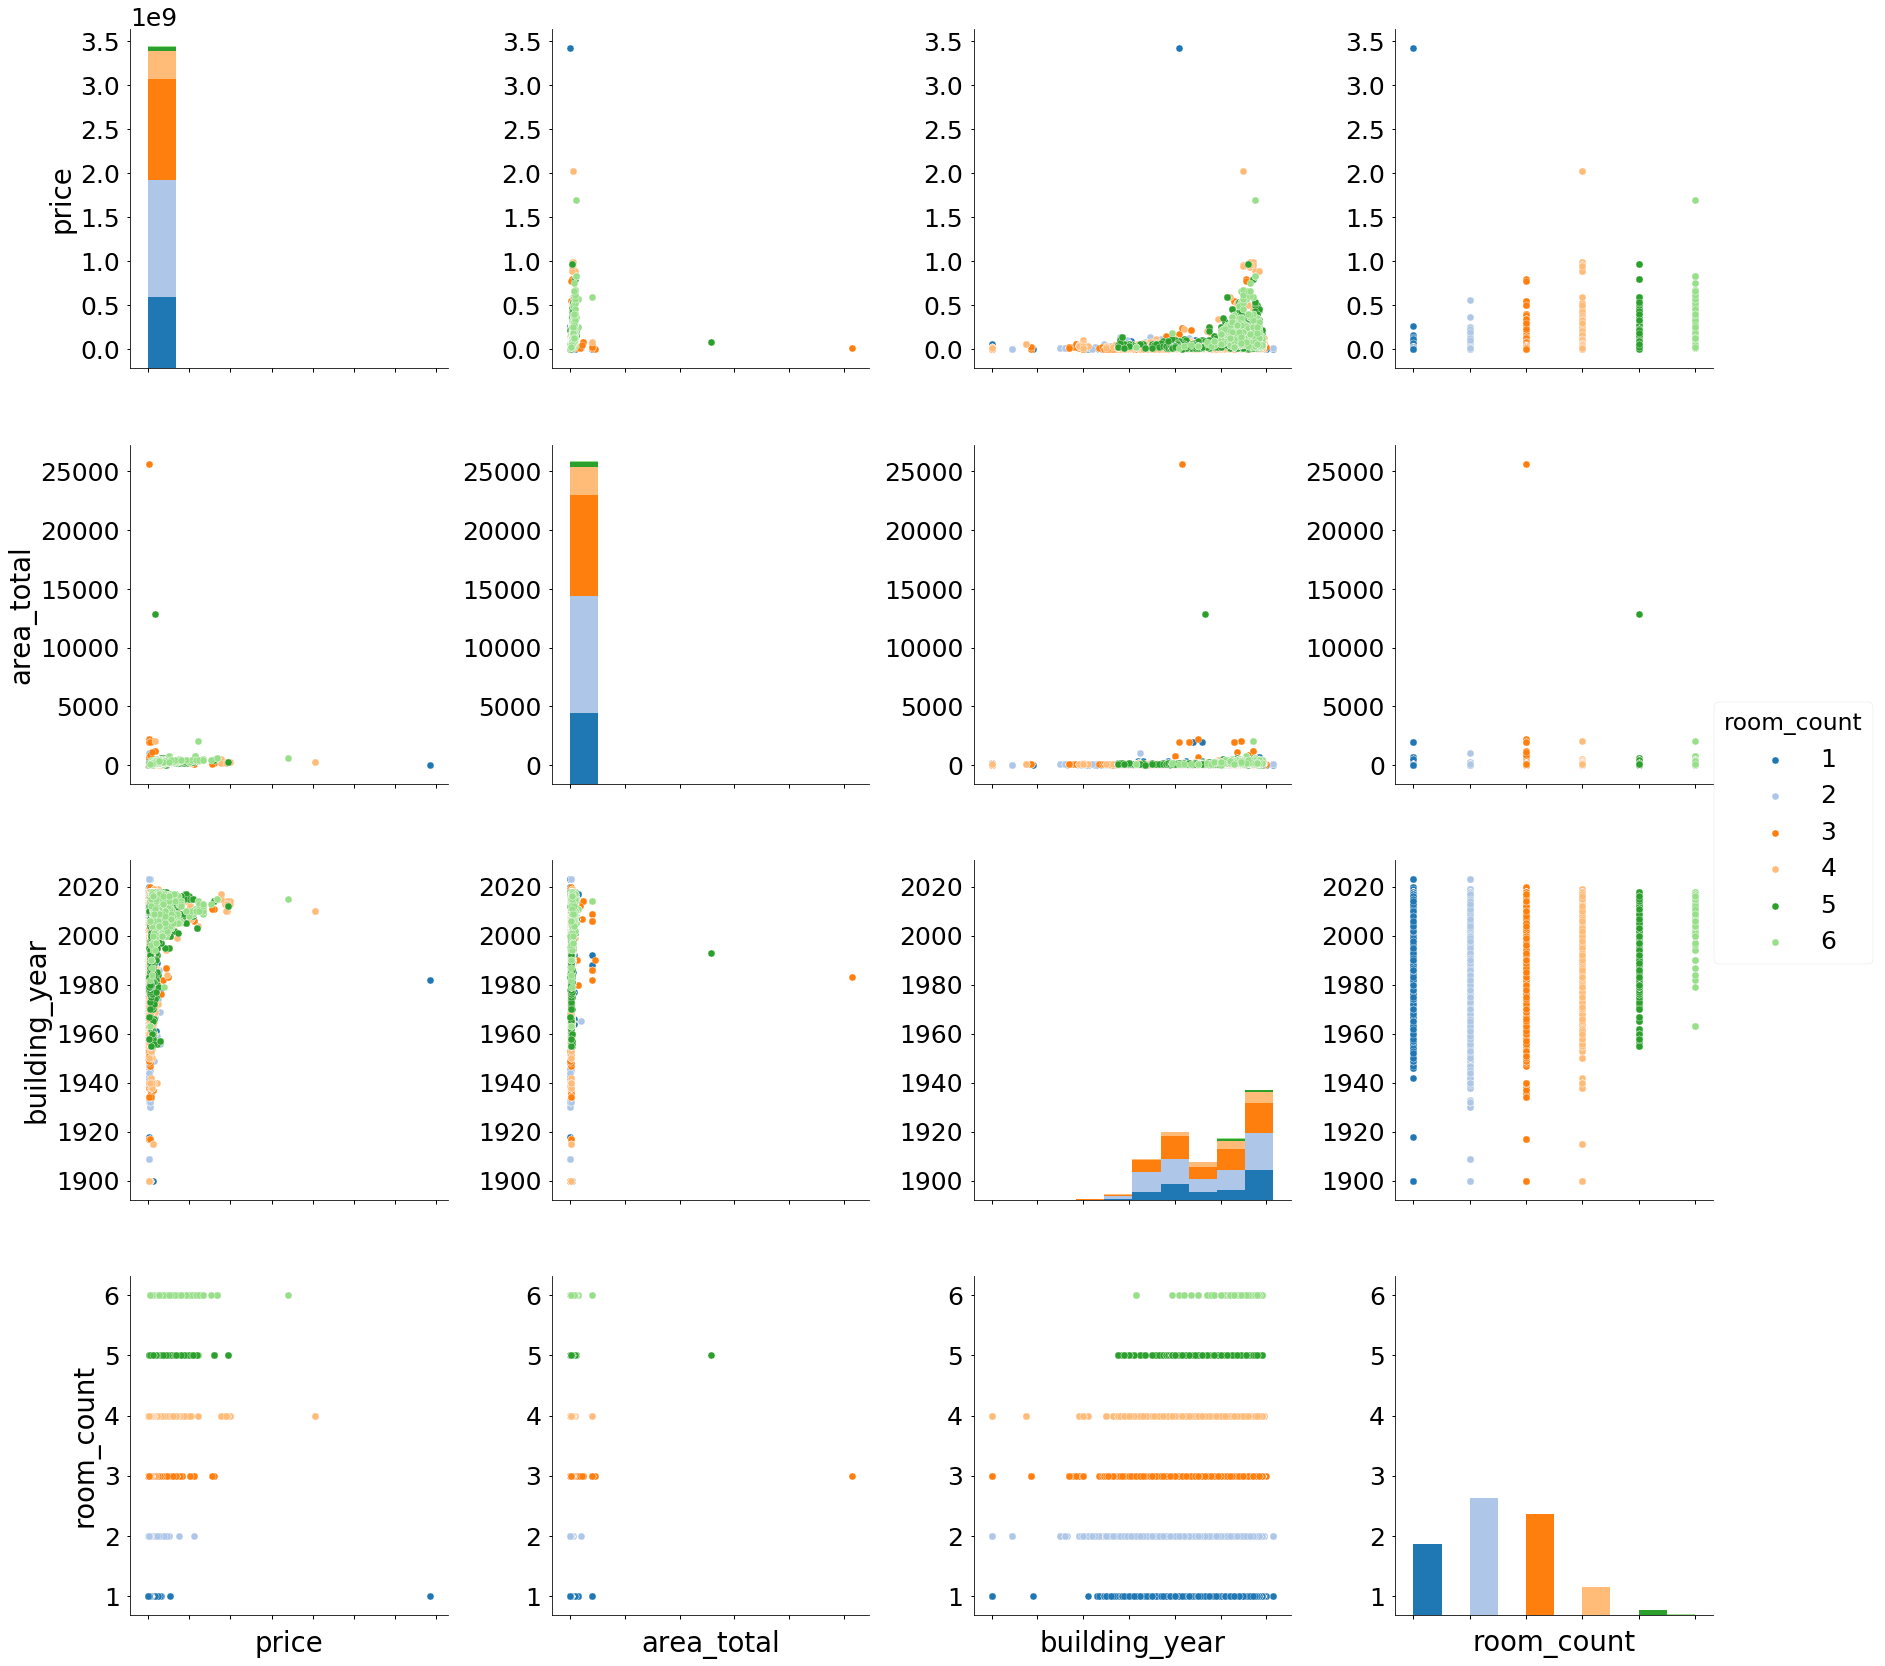

In [7]:
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(cities_data[['price', 'area_total', 'building_year', 'room_count']],
                    hue='room_count', palette='tab20', size=6)

g.set(xticklabels=[]);

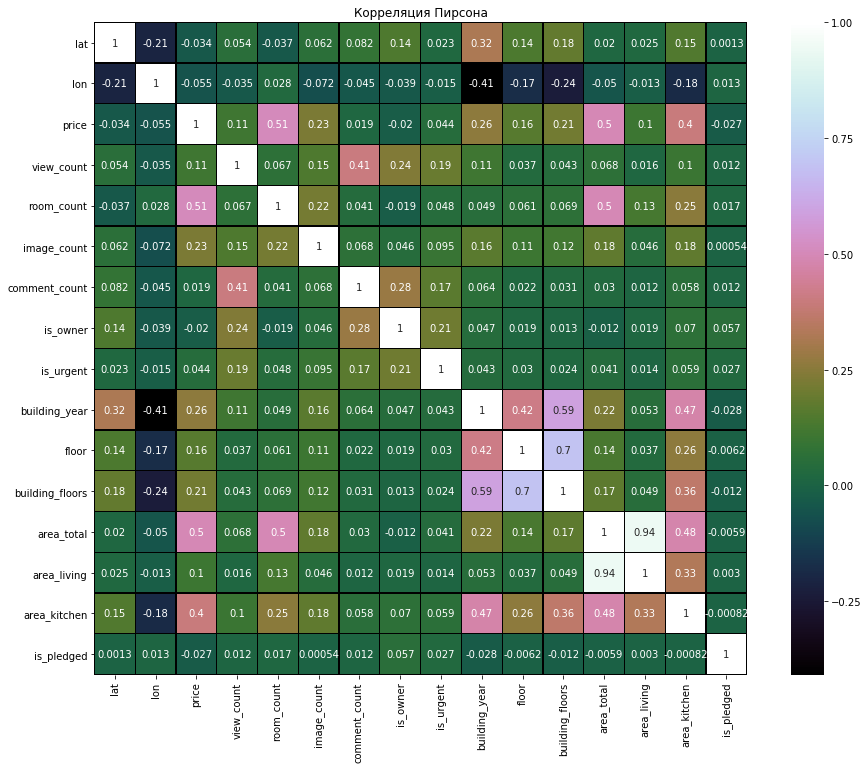

In [8]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Корреляция Пирсона')
sns.heatmap(cities_data.corr(), linewidths=0.25, vmax=1.0, square=True, cmap='cubehelix', linecolor='k', annot=True)

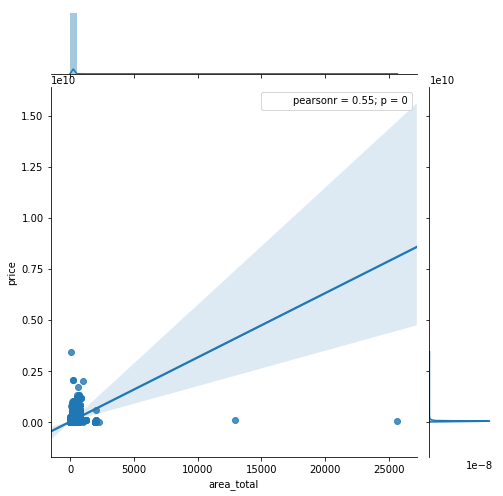

In [8]:
sns.jointplot(x='area_total', y='price', data=cities_data, kind='reg', size=7)
plt.show()

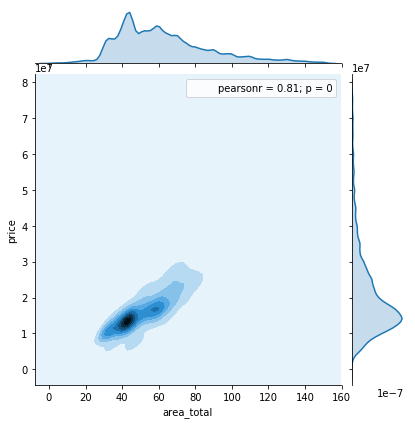

In [25]:
max_price = cities_data['price'].quantile(0.95)
max_area = cities_data['area_total'].quantile(0.95)
max_data = cities_data[(cities_data['price'] < max_price) & (cities_data['area_total'] < max_area)]
# kind = 'kde' OR 'hex'
sns.jointplot(x='area_total', y='price', data=max_data, kind='kde')